# GROUP-3
#MD Fakrul Islam (613839)
#Adama Daffeh (613827) 
#Raj Kumar Thapa (613819)
#Adane Nigus (112351) 

## Imports

In [13]:
import os, sys, math
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE 

Tensorflow version 2.3.0


## Configuration

In [2]:
TARGET_SIZE = [150, 150]
CLASSES = [b'EarlyBlight', b'Healthy', b'LateBlight'] # do not change, maps to the labels in the data (folder names)
print(CLASSES)

[b'EarlyBlight', b'Healthy', b'LateBlight']


In [3]:
!pip install scikit-image

In [14]:
from glob import glob  
import os                                                         
import cv2 
import re
from os.path import join
from glob import glob

In [21]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale = 1./255,
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.2,1.2], # brightness
        fill_mode='reflect', cval=125)    #Also try nearest, constant, reflect, wrap

In [22]:
#tf.keras.preprocessing.image.ImageDataGenerator
from skimage import io

In [23]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "F:/machine_learning_project/split/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='reflect')

VALIDATION_DIR = "F:/machine_learning_project/split/val/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 1506 images belonging to 3 classes.
Found 322 images belonging to 3 classes.


In [24]:
TESTING_DIR = "F:/machine_learning_project/split/test/"
testing_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='reflect')
testing_generator = testing_datagen.flow_from_directory(
	TESTING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 324 images belonging to 3 classes.


In [26]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [35]:
history = model.fit(train_generator, epochs=20, steps_per_epoch=8, validation_data = validation_generator, verbose = 1, validation_steps=8)

model.save("F:/machine_learning_project/custom_cnn_potato.h5")

Epoch 1/20
10/10 [==============================] - 82s 8s/step - loss: 0.8040 - accuracy: 0.6500 - val_loss: 1.1109 - val_accuracy: 0.4720
Epoch 2/20
10/10 [==============================] - 83s 8s/step - loss: 0.7835 - accuracy: 0.6196 - val_loss: 0.8103 - val_accuracy: 0.4752
Epoch 3/20
10/10 [==============================] - 78s 8s/step - loss: 0.8659 - accuracy: 0.6220 - val_loss: 0.7946 - val_accuracy: 0.6304
Epoch 4/20
10/10 [==============================] - 87s 9s/step - loss: 0.8510 - accuracy: 0.6810 - val_loss: 0.6321 - val_accuracy: 0.7857
Epoch 5/20
10/10 [==============================] - 82s 8s/step - loss: 0.6619 - accuracy: 0.7416 - val_loss: 1.5635 - val_accuracy: 0.5994
Epoch 6/20
10/10 [==============================] - 79s 8s/step - loss: 0.7294 - accuracy: 0.7241 - val_loss: 1.0519 - val_accuracy: 0.4752
Epoch 7/20
10/10 [==============================] - 88s 9s/step - loss: 0.6541 - accuracy: 0.7233 - val_loss: 0.6578 - val_accuracy: 0.7360
Epoch 8/20
10/10 [==

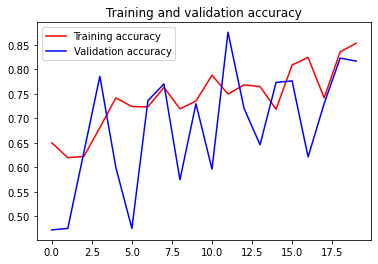

<Figure size 432x288 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [37]:
type(val_acc)
mean_val= np.mean(val_acc[-10:])
print('Mean Validation Accuracy: {}'.format(mean_val))

Mean Validation Accuracy: 0.7378881990909576
